# Processing of US Coastguard GPS disruption data

## Prerequisites

### Installs

In [2]:
%pip install lxml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 57.7 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 35.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 59.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 44.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install rtree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.8 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


### Imports

In [1]:
import pandas as pd
from datetime import datetime as dt
import geopandas
import matplotlib.pyplot as plt

## Webscrape
Run this to webscrape the data to files. If you already have the data locally, skip this section.

### Web scrape GPS interruptions

In [5]:
table_list = pd.read_html(r'https://navcen.uscg.gov/gps-problem-report-status')
table_list[0].to_csv('gps_navcen.csv',index=False)

### Web scrape wikipedia 
#### US state codes

In [6]:
table_list_iso3166= pd.read_html('https://en.wikipedia.org/wiki/ISO_3166-2:US')

In [7]:
US_states_iso3166=table_list_iso3166[0]
US_states_iso3166['clean_state']=US_states_iso3166['Code'].apply(lambda x: x.split('-')[1])
US_states_iso3166.to_csv('US_states_iso3166.csv',index=False)

#### List of sovereign states

In [8]:
sovereign_states_list= pd.read_html('https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2')[2]
sovereign_states_list[sovereign_states_list['Country name (using title case)'].notna()].to_csv('sovereign_states.csv',index=False)

## Processing and Analysis

### Load from csv files

In [79]:
gps_disruption_df=pd.read_csv('gps_navcen.csv')
two_letter_codes=pd.read_csv('US_states_iso3166.csv')
sovereign_states=pd.read_csv('sovereign_states.csv')


In [80]:
gps_disruption_df['User']=gps_disruption_df['Description'].str.split(pat='NAVCEN',n=1,expand=True)[0]
gps_disruption_df['NAVCEN']=gps_disruption_df['Description'].str.split(pat='NAVCEN',n=1,expand=True)[1]

In [81]:
gps_disruption_df

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN
0,04/24/2024 22:35:00 Eastern African Time,NaN,Communications,USER: VSAT Communications including Data and v...,Unknown Interference,04/30/2024,USER: VSAT Communications including Data and v...,: The GPS Operations Center reviewed the GPS C...
1,04/18/2024 17:52:00 Eastern African Time,NaN,Marine,USER: Bab El Mandeb strait NAVCEN: The GPS Ope...,Unknown Interference,04/22/2024,USER: Bab El Mandeb strait,: The GPS Operations Center reviewed the GPS C...
2,04/12/2024 11:20:00 Middle East Time,NaN,NaN,USER: CALLER REPORTED A POSSIBLE CYBER SECURIT...,Unknown Interference,04/15/2024,USER: CALLER REPORTED A POSSIBLE CYBER SECURIT...,: The GPS Operations Center reviewed the GPS C...
3,04/11/2024 12:30:00 Eastern African Time,NaN,Marine,USER: Our vessel on entering Gulf of Aqaba exp...,Unknown Interference,04/15/2024,USER: Our vessel on entering Gulf of Aqaba exp...,: The GPS Operations Center reviewed the GPS C...
4,04/11/2024 18:38:00 GMT,NaN,Marine,"USER: On 11th April, 1838 UTC, MT Toya while a...",Unknown Interference,04/15/2024,"USER: On 11th April, 1838 UTC, MT Toya while a...",: The GPS Operations Center reviewed the GPS C...
...,...,...,...,...,...,...,...,...
544,01/03/2017 11:AM CST,San Angelo Airport,Aviation,User: The GPS systems in normal mode not milit...,Unintentional Interference,05/20/2019,User: The GPS systems in normal mode not milit...,: Report referred to FCC. FCC conducted an inv...
545,01/02/2017 3:00 EST,North Carolina - South Carolina border,Transportation,User: GPS would say when you plug in that ther...,User Equipment,05/20/2019,User: GPS would say when you plug in that ther...,: The GPS Operations Center reviewed the GPS C...
546,01/01/2017 12:00 EST,"Elizabeth, NJ",Transportation,"User: My business is located in Elizabeth, NJ....",Mapping Issue,05/20/2019,"User: My business is located in Elizabeth, NJ....",: User provided information on how to contact ...
547,11/16/2016 7h37 UTC,"Rennes, France",Research,User: I experimented high range error on PRN 3...,User Equipment,05/20/2019,User: I experimented high range error on PRN 3...,: The GPS Operations Center reviewed the GPS C...


## Analyse disruptions by date

In [82]:
gps_disruption_df['local_date']=gps_disruption_df['Disruption Date/Time']\
.apply(lambda x:dt.strptime(x[0:10],'%m/%d/%Y'))

The local date is the UTC date with up to 0.5 day error. That's not bad for analysis to the nearest day. This will have to be improved for more precise analysis.

<Axes: xlabel='local_date'>

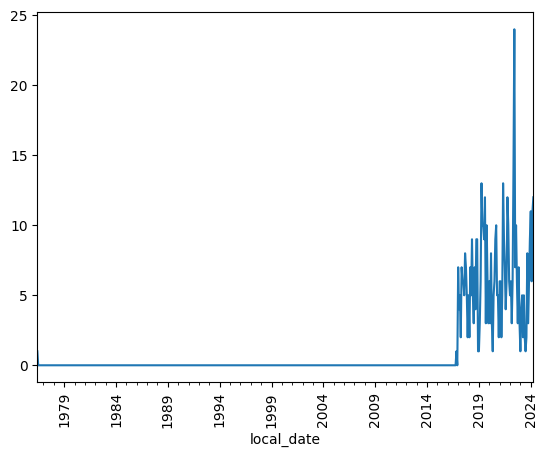

In [83]:
(gps_disruption_df
 .resample('ME', on='local_date')
 .count()
 ['Disruption Date/Time']
 .plot(rot=90)
)

In [84]:
(gps_disruption_df
 .set_index('local_date')
 .sort_index()
 .iloc[0:2]
)

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN
local_date,,,,,,,,
1976-06-22,06/22/1976 00:08:31 EST,NaN,Other,USER: Ongoing issues NAVCEN: The GPS Operation...,Insufficient Information,08/14/2023,USER: Ongoing issues,: The GPS Operations Center reviewed the GPS C...
2016-11-16,11/16/2016 7h37 UTC,"Rennes, France",Research,User: I experimented high range error on PRN 3...,User Equipment,05/20/2019,User: I experimented high range error on PRN 3...,: The GPS Operations Center reviewed the GPS C...


<Axes: xlabel='local_date'>

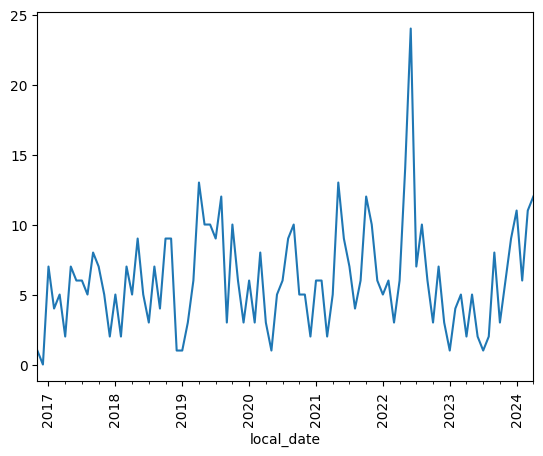

In [85]:
(gps_disruption_df
 .set_index('local_date')
 .sort_index()
 .iloc[1:]
.resample('ME')
 .count()
 ['Disruption Date/Time']
 .plot(rot=90)
)

## Analyse disruptions by location

### Add UK and US to two letter codes

In [86]:
two_letter_codes['code_spaced']=two_letter_codes['Code'].str.replace('-',' ')

In [87]:
two_letter_codes=\
pd.concat([two_letter_codes,\
           pd.DataFrame({'Code':"GB",'Subdivision name (en)':"United Kingdom",'Subdivision category':"Country",'clean_state':"UK",'code_spaced':"UK"},index=[two_letter_codes['Code'].count()])])
two_letter_codes=\
pd.concat([two_letter_codes,\
           pd.DataFrame({'Code':"US",'Subdivision name (en)':"United States",'Subdivision category':"Country",'clean_state':"US",'code_spaced':"US"},index=[two_letter_codes['Code'].count()])])

In [88]:
two_letter_codes

,Code,Subdivision name (en),Subdivision category,clean_state,code_spaced
0,US-AL,Alabama,State,AL,US AL
1,US-AK,Alaska,State,AK,US AK
2,US-AZ,Arizona,State,AZ,US AZ
3,US-AR,Arkansas,State,AR,US AR
4,US-CA,California,State,CA,US CA
5,US-CO,Colorado,State,CO,US CO
6,US-CT,Connecticut,State,CT,US CT
7,US-DE,Delaware,State,DE,US DE
8,US-FL,Florida,State,FL,US FL
9,US-GA,Georgia,State,GA,US GA


<Axes: >

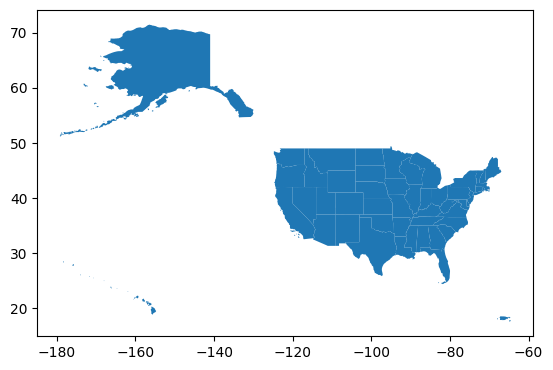

In [89]:

fname = "https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/us-state-boundaries/exports/geojson?lang=en&timezone=Europe%2FLondon"

us_states_df = geopandas.read_file(fname).clip([-180, 0, -50, 75])


us_states_df.plot()



Cutting out some aleutian islands?

### Add previous and common names to ISO list

In [90]:
sovereign_states['previous country name']=\
sovereign_states['Notes']\
.str.split(pat='Previous ISO country name: ',n=1,expand=True)[1]\
.str.split(pat='(',n=1,expand=True)[0]\
.str.split(pat=';',n=1,expand=True)[0]\
.str.split(pat='.',n=1,expand=True)[0].str.strip()

#       if 'Previous ISO country name: ' in str(x) \
#       else None ) 


In [91]:
sovereign_states['common name']=\
sovereign_states['Notes']\
.str.split(pat='common name: ',n=1,expand=True)[1]\
.str.split(pat=')',n=1,expand=True)[0].str.strip()
       #if 'common name: ' in str(x) \
       #else None )

In [92]:
sovereign_states[sovereign_states['previous country name'].notna()]

,Code,Country name (using title case),Year,ccTLD,Notes,previous country name,common name
27,BN,Brunei Darussalam,1974,.bn,Previous ISO country name: Brunei,Brunei,None
28,BO,Bolivia (Plurinational State of),1974,.bo,Previous ISO country name: Bolivia,Bolivia,None
29,BQ,"Bonaire, Sint Eustatius and Saba",2010,.bq,"Consists of three Caribbean ""special municipal...","Bonaire, Saint Eustatius and Saba BQ previous...",None
46,CM,Cameroon,1974,.cm,"Previous ISO country name: Cameroon, United Re...","Cameroon, United Republic of",None
55,CZ,Czechia,1993,.cz,Previous ISO country name: Czech Republic,Czech Republic,None
65,EH,Western Sahara,1974,NaN,Previous ISO country name: Spanish Sahara (cod...,Spanish Sahara,None
72,FM,Micronesia (Federated States of),1986,.fm,Previous ISO country name: Micronesia,Micronesia,None
76,GB,United Kingdom of Great Britain and Northern I...,1974,.gb (.uk),Includes Akrotiri and Dhekelia (Sovereign Base...,United Kingdom,None
107,IR,Iran (Islamic Republic of),1974,.ir,Previous ISO country name: Iran,Iran,None
116,KH,Cambodia,1974,.kh,Code taken from former name: Khmer Republic P...,"Kampuchea, Democratic",None


In [93]:
sovereign_states[sovereign_states['common name'].notna()]

,Code,Country name (using title case),Year,ccTLD,Notes,previous country name,common name
71,FK,Falkland Islands (Malvinas),1974,.fk,ISO country name follows UN designation due to...,None,Falkland Islands
120,KP,Korea (Democratic People's Republic of),1974,.kp,ISO country name follows UN designation (commo...,None,North Korea
121,KR,"Korea, Republic of",1974,.kr,ISO country name follows UN designation (commo...,None,South Korea
190,RU,Russian Federation,1992,.ru,ISO country name follows UN designation (commo...,None,Russia
227,TW,"Taiwan, Province of China",1974,.tw,Covers the current jurisdiction of the Republi...,None,Taiwan
240,VN,Viet Nam,1974,.vn,ISO country name follows UN designation (commo...,None,Vietnam


### Clean up Location to get country/code 

In [94]:
def token_search(x_string):
    """ This is a function that matches a US state 2 letter code in the string and returns, or country name and returns, or previous country name and returns, or US state full name and returns"""
    for x_element in x_string.split():
        x_el_stripped=x_element.strip(',').strip(',')
        if x_el_stripped in list(two_letter_codes['clean_state' ]) and x_string.upper != x_string:
            return list(two_letter_codes[two_letter_codes['clean_state']==x_el_stripped]['code_spaced'].to_dict().values())[0]
    for us_state in list(two_letter_codes['Subdivision name (en)']):
        if us_state.upper() in x_string.upper().replace('&','AND'):
            return  list(two_letter_codes[two_letter_codes['Subdivision name (en)']==us_state]['code_spaced'].to_dict().values())[0]
    for sovereign_state in list(sovereign_states['Country name (using title case)']):
        if sovereign_state.upper() in x_string.upper().replace('&','AND'):
            return  list(sovereign_states[sovereign_states['Country name (using title case)']==sovereign_state]['Code'].to_dict().values())[0]
    for sovereign_state in list(sovereign_states[sovereign_states['previous country name'].notna()]['previous country name']):
        if sovereign_state.upper() in x_string.upper().replace('&','AND'):
            return  list(sovereign_states[sovereign_states['previous country name']==sovereign_state]['Code'].to_dict().values())[0]
    for sovereign_state in list(sovereign_states[sovereign_states['common name'].notna()]['common name']):
        if sovereign_state.upper() in x_string.upper().replace('&','AND'):
            return  list(sovereign_states[sovereign_states['common name']==sovereign_state]['Code'].to_dict().values())[0]



In [95]:
gps_disruption_df['location_state_country']=(gps_disruption_df['Location']
 .str.strip()
 .str.split(pat=',',n=1,expand=True)[1]
 .str.strip()
 .combine_first(
     gps_disruption_df['Location']
     .str.strip()
     .str.split(pat=',',n=1,expand=True)[0]
     .str.strip()

 )
)

In [96]:
gps_disruption_df[['Location','location_state_country']]

,Location,location_state_country
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
544,San Angelo Airport,San Angelo Airport
545,North Carolina - South Carolina border,North Carolina - South Carolina border
546,"Elizabeth, NJ",NJ
547,"Rennes, France",France


<Axes: ylabel='location_state_country'>

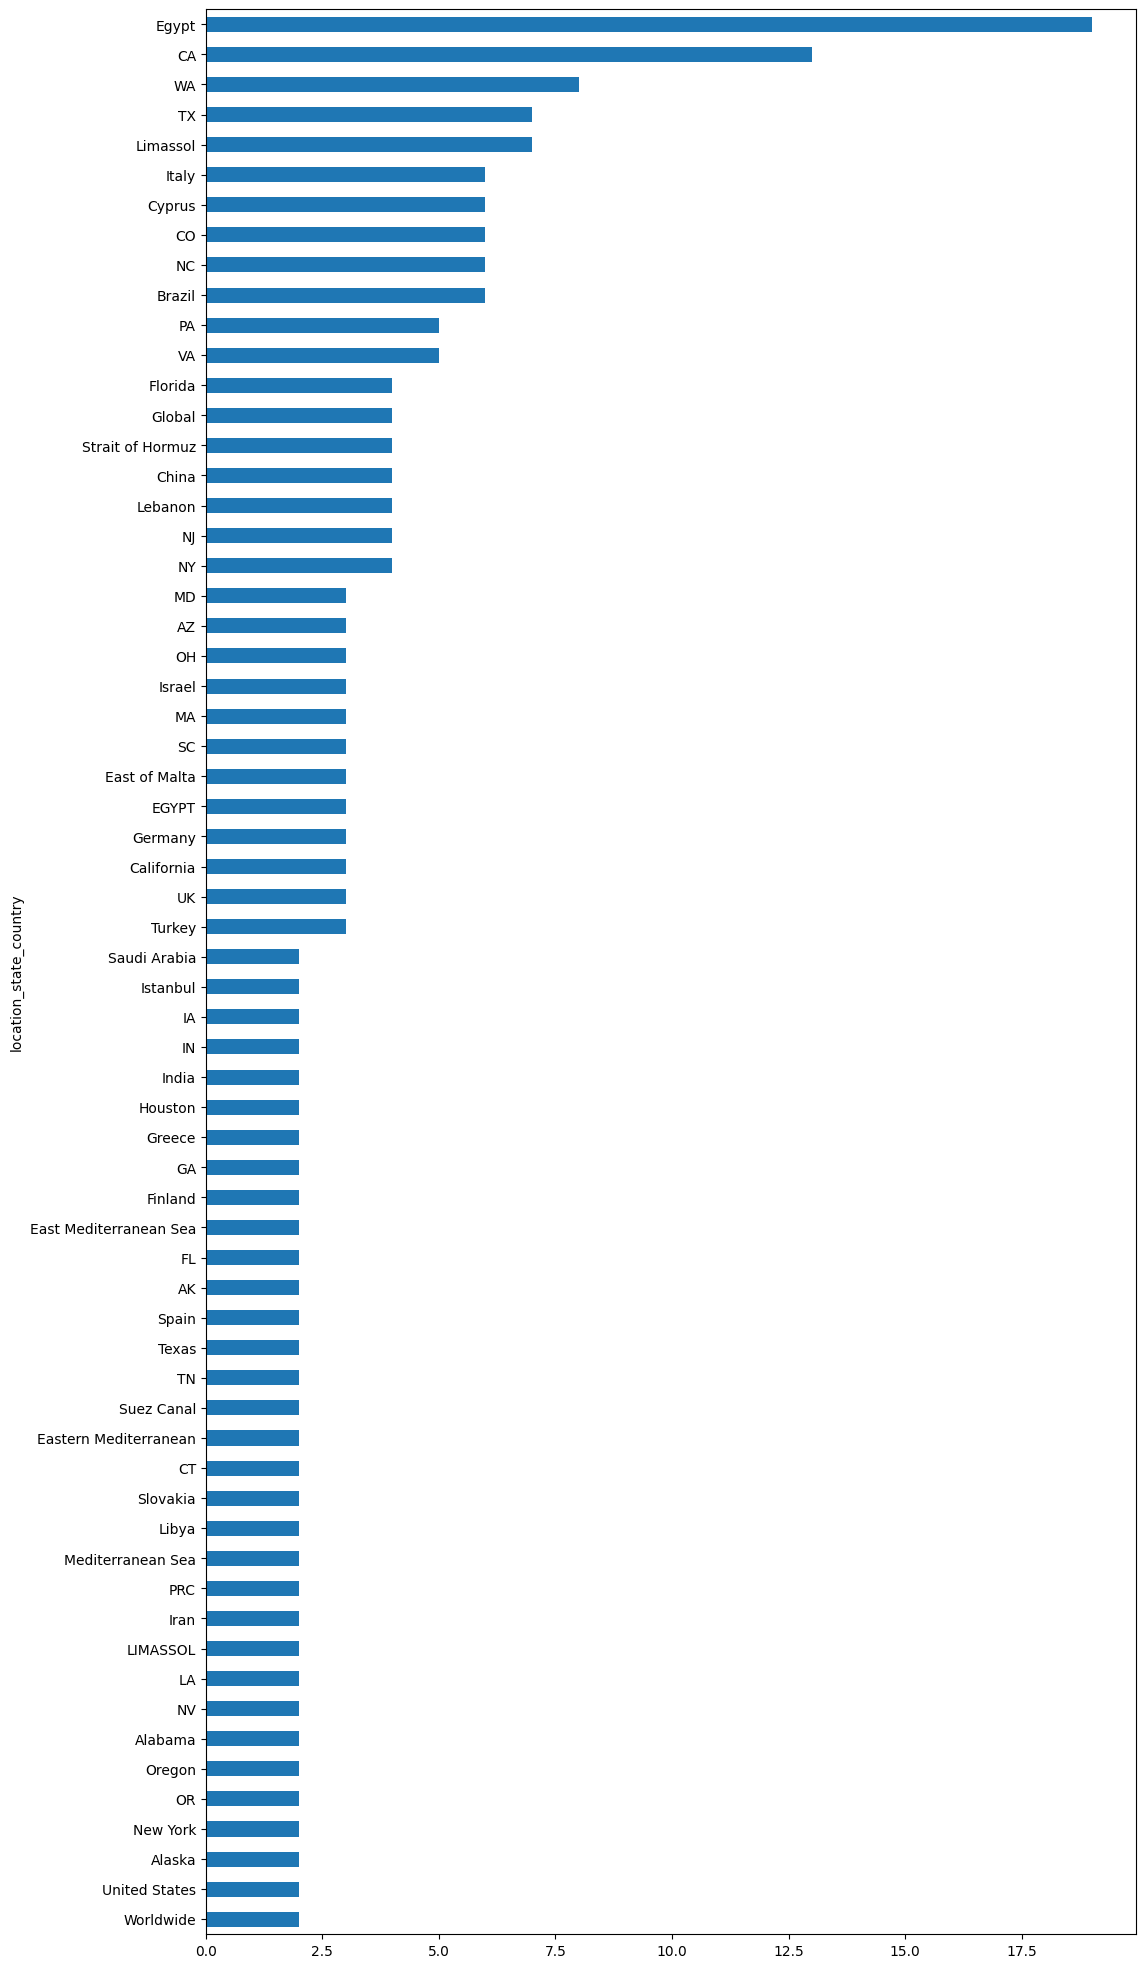

In [97]:
gps_disruption_counted=(gps_disruption_df[gps_disruption_df['location_state_country'].notna()]
                        .groupby('location_state_country')
                        .count()['Disruption Date/Time']
                        
                        .sort_values()
                       )
gps_disruption_counted[gps_disruption_counted>1].plot(kind='barh',figsize=[12,25])

### Analyse per country, US state

In [98]:
gps_disruption_df[gps_disruption_df['Location']=='Channel Islands, CA']['Description'].to_dict()

{530: 'User: Several systems, across all of our assets at sea, all affected NAVCEN: The GPS Operations Center reviewed the GPS Constellation and Control Segment, there are no known anomalies that might affect GPS signal integrity at the time and vicinity of the reported outage. Space Weather was reviewed and found unlikely to have impacted GPS performance. No correlating reports from other users or interagency partners. Authorized GPS testing was scheduled within 200 miles of the reported location and may have impacted GPS performance.'}

There is such a thing as https://en.wikipedia.org/wiki/Channel_Islands_(California)

### No Unmatched locations

In [99]:
gps_disruption_df.query('Location in ("Worldwide","Global","At sea")')[['local_date','Location','Description','Cause']]

,local_date,Location,Description,Cause
220,2021-07-28,At sea,USER: The vessel was sailing towards port said...,Unknown Interference
267,2021-01-16,Global,CNES has detected a repetition of IODE for PRN...,IODC_10-Bit
298,2020-08-04,Global,User: CNES (Centre National d Etudes Spatiales...,ICD_Violation
324,2020-02-12,Worldwide,"User: In February 2020 (Feb 12th, 13th, 15th a...",ICD_Violation
415,2019-02-01,Global,User: Thanks to Navigation and Timing Monitori...,NaN
485,2017-11-30,Global,User: GPS PRN22 orbit error started to wander ...,User Equipment
501,2017-09-20,Worldwide,User: It appears that the Subframe-2 IODC mess...,User Equipment


In [100]:
gps_disruption_df.query('Location=="United States"')[['Description']]

,Description
406,At roughly 8:45 PM CST lost GPS Sync to variou...
416,User: Observation of GPS NANU times in relatio...


In [101]:
for description_str in gps_disruption_df.query('Location=="United States"')['Description']:
    print(description_str)

At roughly 8:45 PM CST lost GPS Sync to various cell sites around the US. The common GPS is trend is dual cones feeding sync to UMTS and LTE technologies. To mitigate the issue Field Technicians have removed one of the GPS cones and have a master sync from LTE feeding UMTS. There was no back office or architectural changes to our network during this time that would have caused this failure. We are curious if there were any changes made in preparation of the GPS System rollover slated for tomorrow April 6th that may have affected the base stations to lose sync. NAVCEN: The U.S. Air Force points to Interface Specification IS-GPS-200, paragraph 20.3.3.5.2.2, Almanac Reference Time, which states: "The almanac reference time, t(oa), is some some multiple of 2(12) seconds occurring approximately 70 hours after the first valid transmission time for this almanac data set (reference 20.3.4.5). The almanac is updated often enough to ensure that GPS time, t, shall differ from t(oa) by less than 3

In [102]:
gps_disruption_df.query('Location in ("Mediterranean Sea","Eastern Mediterranean","East Mediterranean Sea")')
#[['Description','NAVCEN']]#'matched_location_country_state',

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN,local_date,location_state_country
239,05/22/2021 23:23 GMT,East Mediterranean Sea,Marine,User indicated an intermittent problem that wa...,Unknown Interference,05/27/2021,User indicated an intermittent problem that wa...,: The GPS Operations Center reviewed the GPS C...,2021-05-22,East Mediterranean Sea
249,04/28/2021 2012 EEST,Eastern Mediterranean,Transportation,USER: roughly 12 hours of gps spoofing upon de...,Unknown Interference,05/27/2021,USER: roughly 12 hours of gps spoofing upon de...,: The GPS Operations Center reviewed the GPS C...,2021-04-28,Eastern Mediterranean
252,04/18/2021 1620 GMT,East Mediterranean Sea,Marine,Lost GPS signal for six-minutes from 1620 GMT ...,Unknown Interference,05/03/2021,Lost GPS signal for six-minutes from 1620 GMT ...,: The GPS Operations Center reviewed the GPS C...,2021-04-18,East Mediterranean Sea
253,04/13/2021 0200 (Arabic) Egypt Standard Time (...,Eastern Mediterranean,Marine,"GPS jamming begins, affecting both GPS units. ...",Unknown Interference,05/03/2021,"GPS jamming begins, affecting both GPS units. ...",: The GPS Operations Center reviewed the GPS C...,2021-04-13,Eastern Mediterranean
281,09/25/2020 0145 GMT,Mediterranean Sea,Marine,User: Additional vessel in area were experienc...,Unknown Interference,10/20/2020,User: Additional vessel in area were experienc...,: The GPS Operations Center reviewed the GPS C...,2020-09-25,Mediterranean Sea
283,09/25/2020 0130 GMT,Mediterranean Sea,Marine,User: Intermittent GPS signal beginning at 013...,Unknown Interference,10/20/2020,User: Intermittent GPS signal beginning at 013...,: The GPS Operations Center reviewed the GPS C...,2020-09-25,Mediterranean Sea


In [103]:
for description_str in gps_disruption_df.query('Location in ("Mediterranean Sea","Eastern Mediterranean","East Mediterranean Sea")')\
['Description']:
    print(description_str)
    #still not picking port said egypt here

User indicated an intermittent problem that was otherwise unspecified. NAVCEN: The GPS Operations Center reviewed the GPS Constellation and Control Segment, there are no known anomalies that might affect GPS signal integrity at the time and vicinity of the reported problem. Space weather was reviewed and found unlikely to have impacted GPS performance. There were no authorized GPS tests in the area. No correlating reports from interagency partners. The report of interference is similar to that outlined by U.S. Maritime Administration in Maritime Advisory 2021-004-Various GPS Interference. User encouraged to report the issue to the nearest communication authority.
USER: roughly 12 hours of gps spoofing upon departure from port Said Egypt. GPS signal rapidly shifted numerous times, position 6-8 miles off. Position dropped for 90 percent of the 12 hours. GPS aboard connected to ECDIS, RADAR,AIS, GYRO repeater panel, GMDSS suite. NAVCEN: The GPS Operations Center reviewed the GPS Constella

<Axes: title={'center': 'Entries not about interference'}, ylabel='location_state_country'>

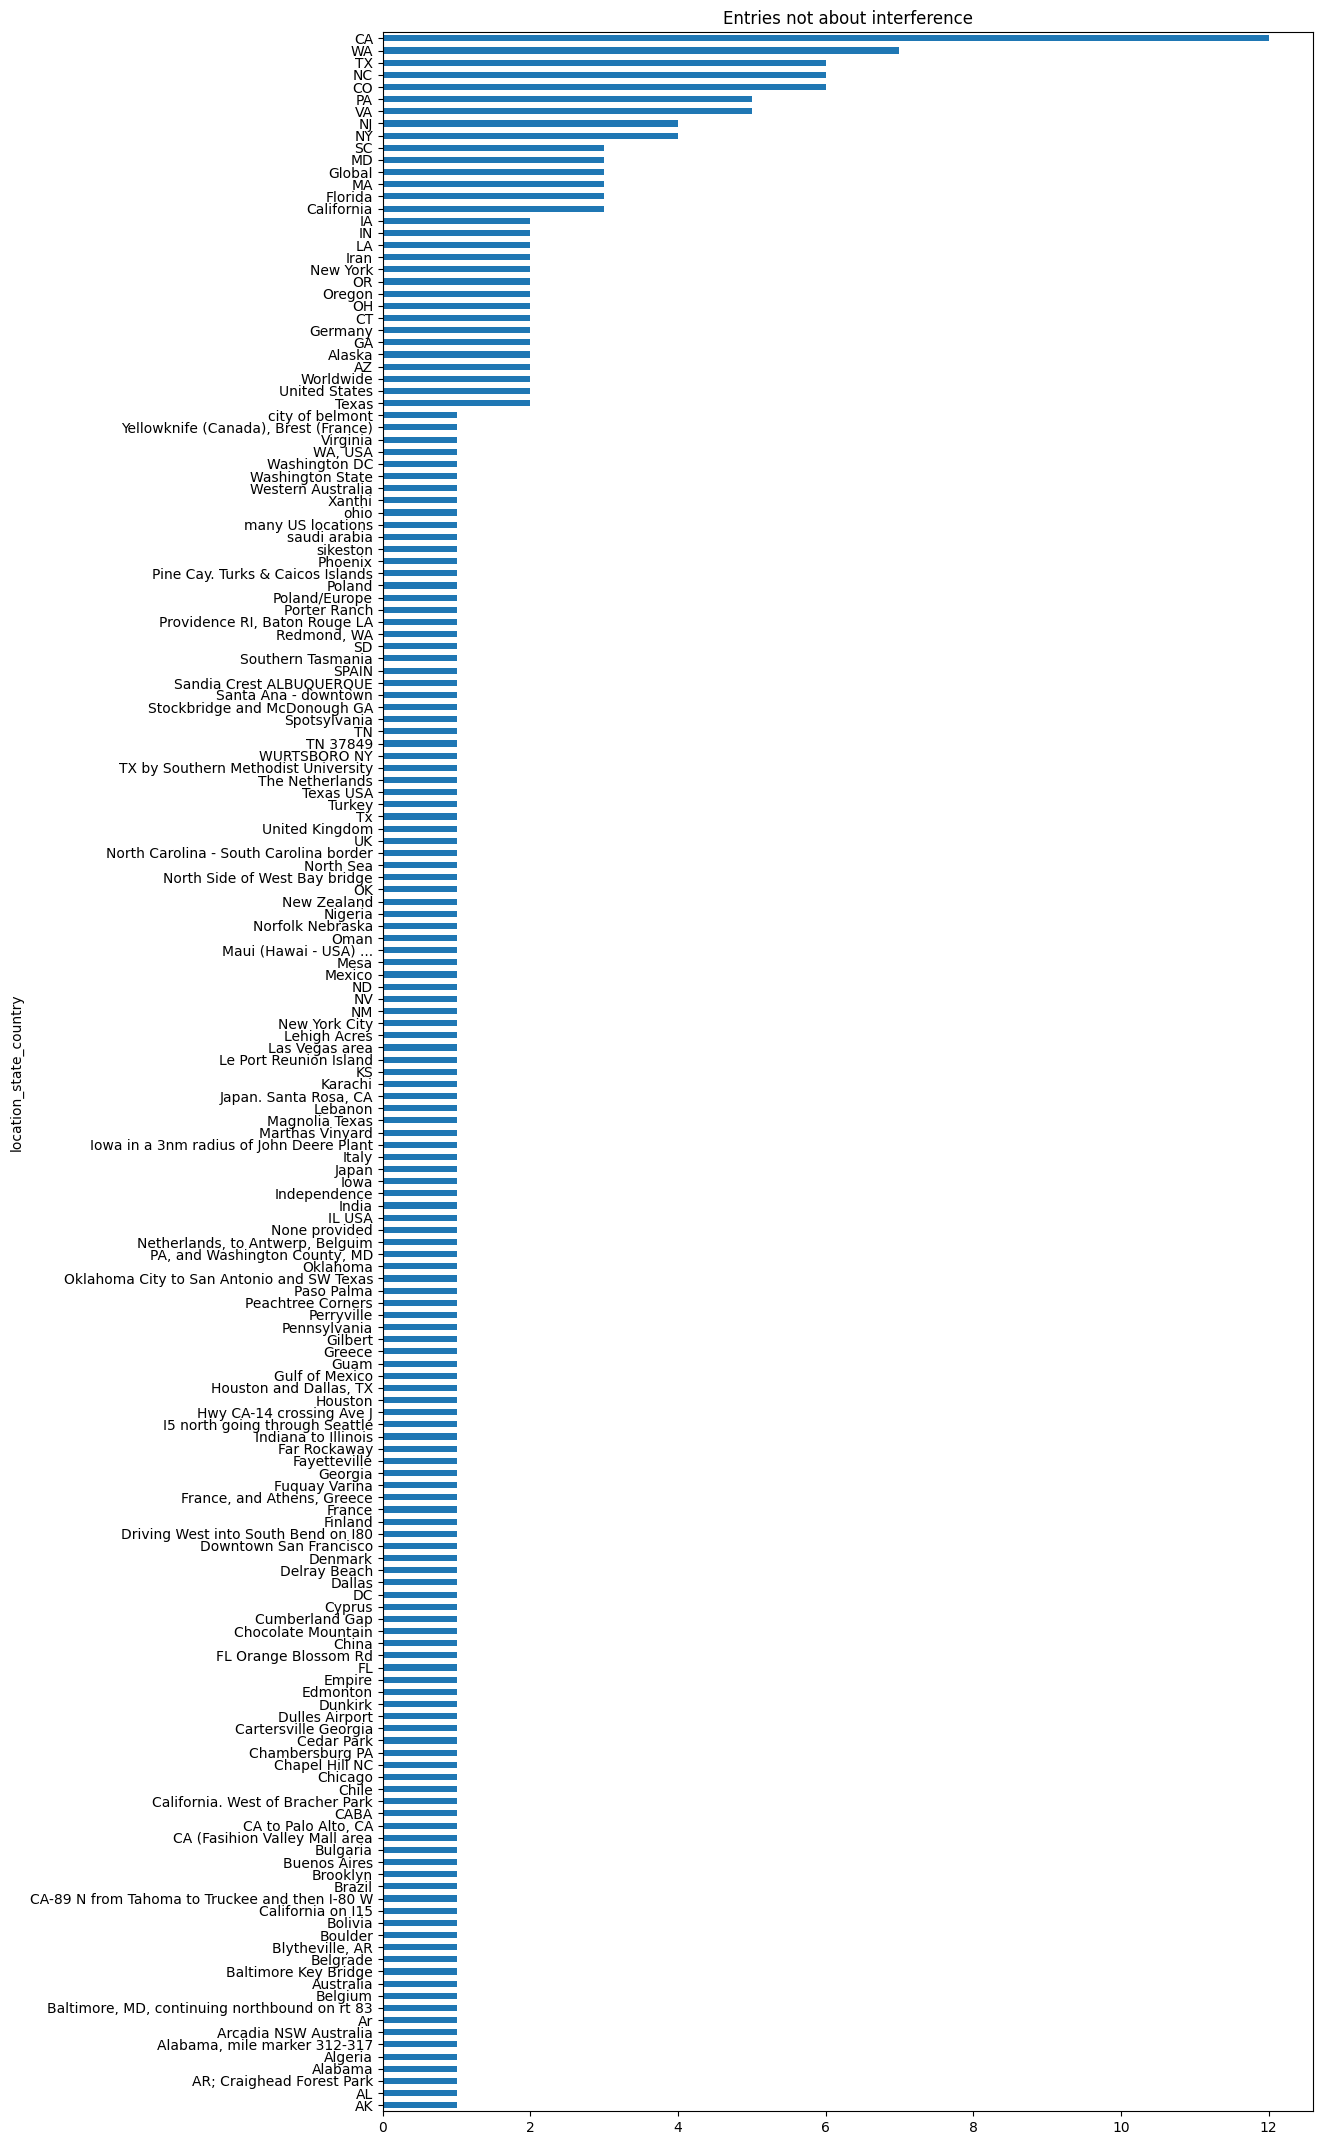

In [104]:
(gps_disruption_df.query('Cause.notna() and not Cause.str.contains("Interference", na=False)')
.groupby('location_state_country')
 .count()
 ['Disruption Date/Time']
 .sort_values()
 .plot(kind='barh',figsize=[12,27],title='Entries not about interference')
)

Note the US dominating this list.

<Axes: title={'center': 'Entries about Interference'}, ylabel='location_state_country'>

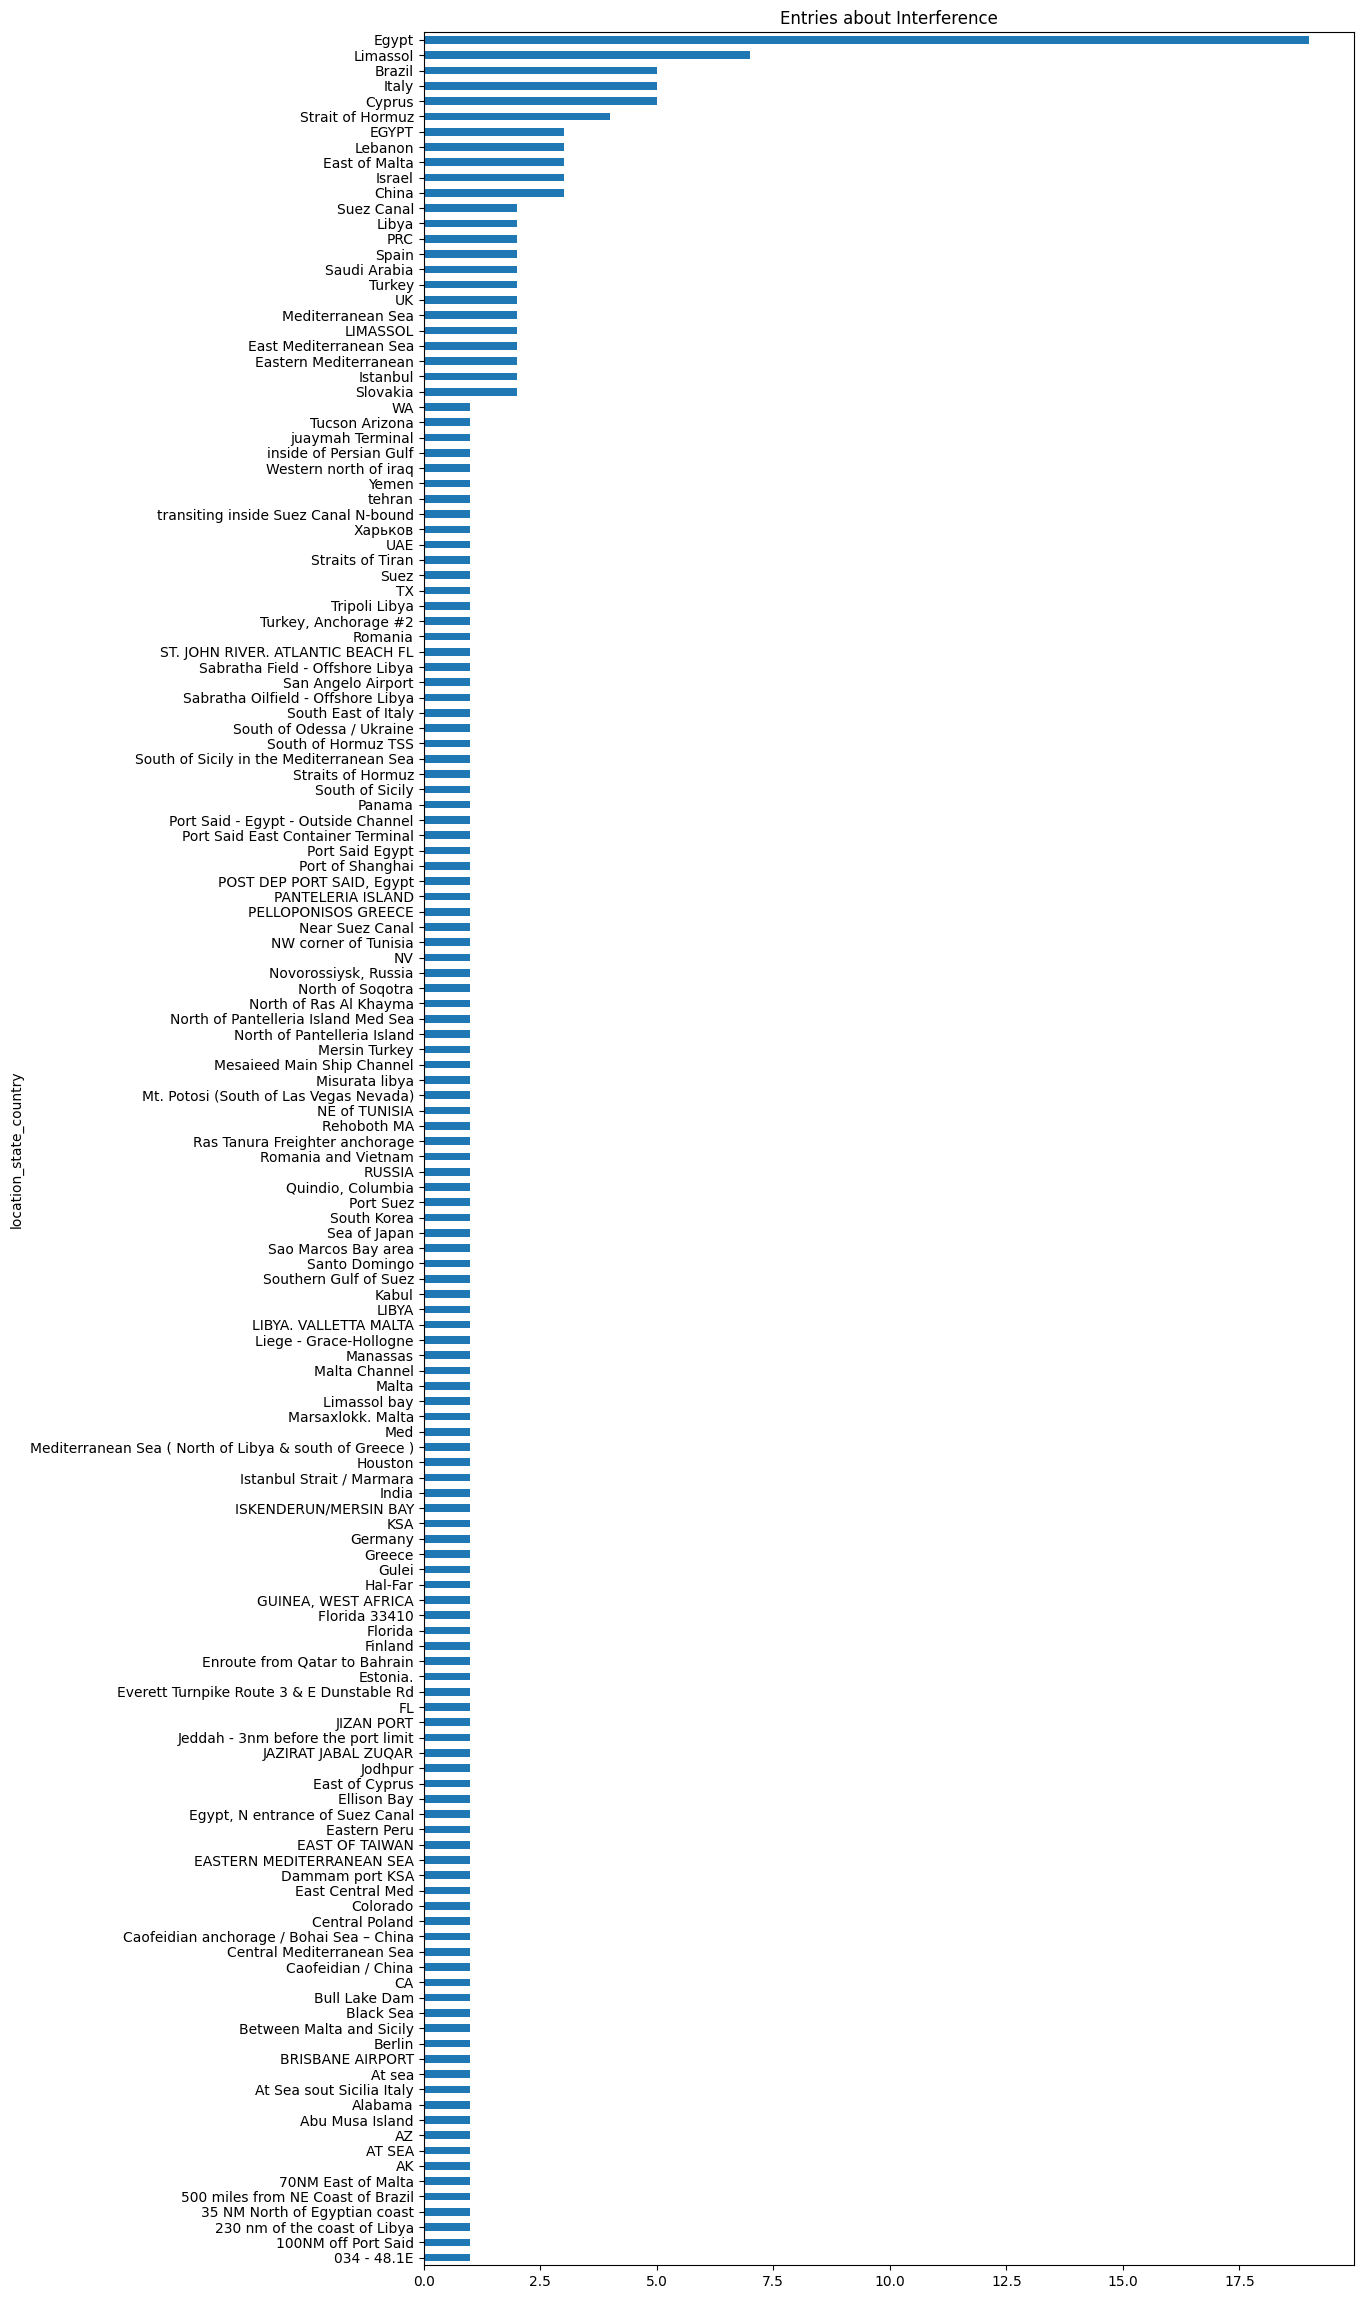

In [105]:
gps_disruption_df[gps_disruption_df['location_state_country'].notna() & gps_disruption_df['Cause'].str.contains('Interference')]\
.groupby('location_state_country').count()['Disruption Date/Time'].sort_values()\
.plot(kind='barh',figsize=[12,29],title='Entries about Interference')

US is still high in this list but the mediterranean countries form the other top cluster

In [108]:
non_rfi=(gps_disruption_df
         .query('Cause.notna() and not Cause.str.contains("Interference", na=False) and location_state_country.str.len()==2.0 ')
         .rename(columns={"location_state_country":"stusab","Disruption Date/Time":"rfi_count"})
         .groupby('stusab')
         .count()
         [['rfi_count']]
        )

In [109]:
non_rfi

,rfi_count
stusab,
AK,1
AL,1
AZ,2
Ar,1
CA,12
CO,6
CT,2
DC,1
FL,1


<Axes: >

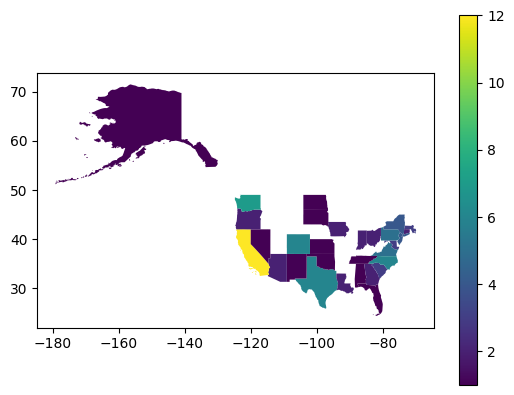

In [112]:
(us_states_df
 .dropna(axis='columns',how='all')
 .set_index('stusab')
 .merge(non_rfi,left_index=True, right_index=True)
 .plot(column='rfi_count',legend=True)
)